In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('../data/Iris.csv', index_col='Id')
data_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
FEAT_COLS = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# 1. EDA - Exploration Data Analysis

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
data_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
versicolor = data_df[data_df['Species'] == 'Iris-versicolor']
setosa = data_df[data_df['Species'] == 'Iris-setosa']
virginica = data_df[data_df['Species'] == 'Iris-virginica']

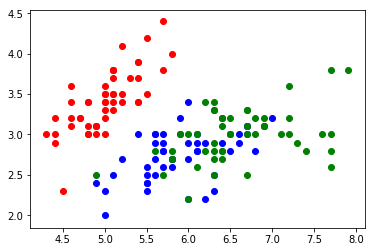

In [7]:
plt.scatter(x=setosa['SepalLengthCm'], y=setosa['SepalWidthCm'], c='r')
plt.scatter(x=versicolor['SepalLengthCm'], y=versicolor['SepalWidthCm'], c='b')
plt.scatter(x=virginica['SepalLengthCm'], y=virginica['SepalWidthCm'], c='g')

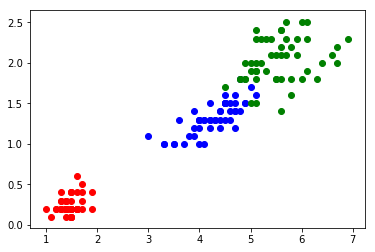

In [8]:
plt.scatter(x=setosa['PetalLengthCm'], y=setosa['PetalWidthCm'], c='r')
plt.scatter(x=versicolor['PetalLengthCm'], y=versicolor['PetalWidthCm'], c='b')
plt.scatter(x=virginica['PetalLengthCm'], y=virginica['PetalWidthCm'], c='g')

# 2. Data predict

In [9]:
for i in train_test_split(data_df, test_size = 1/3, random_state=10):
    print(i)
    print('=====================================')

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
Id                                                                            
69             6.2           2.2            4.5           1.5  Iris-versicolor
110            7.2           3.6            6.1           2.5   Iris-virginica
82             5.5           2.4            3.7           1.0  Iris-versicolor
79             6.0           2.9            4.5           1.5  Iris-versicolor
52             6.4           3.2            4.5           1.5  Iris-versicolor
15             5.8           4.0            1.2           0.2      Iris-setosa
49             5.3           3.7            1.5           0.2      Iris-setosa
64             6.1           2.9            4.7           1.4  Iris-versicolor
21             5.4           3.4            1.7           0.2      Iris-setosa
138            6.4           3.1            5.5           1.8   Iris-virginica
30             4.7           3.2            1.6     

In [10]:
train_df, test_df = train_test_split(data_df, test_size = 1/3, random_state=10)

**note1**
```python
X = iris_data[FEAT_COLS].values
y = iris_data['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)
```

In [11]:
test_df.iterrows

<bound method DataFrame.iterrows of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
Id                                                                            
88             6.3           2.3            4.4           1.3  Iris-versicolor
112            6.4           2.7            5.3           1.9   Iris-virginica
11             5.4           3.7            1.5           0.2      Iris-setosa
92             6.1           3.0            4.6           1.4  Iris-versicolor
50             5.0           3.3            1.4           0.2      Iris-setosa
61             5.0           2.0            3.5           1.0  Iris-versicolor
73             6.3           2.5            4.9           1.5  Iris-versicolor
68             5.8           2.7            4.1           1.0  Iris-versicolor
40             5.1           3.4            1.5           0.2      Iris-setosa
56             5.7           2.8            4.5           1.3  Iris-versicolor
67             5

In [12]:
for idx, row in test_df.iterrows():
    print(row)
    print('===============================')

SepalLengthCm                6.3
SepalWidthCm                 2.3
PetalLengthCm                4.4
PetalWidthCm                 1.3
Species          Iris-versicolor
Name: 88, dtype: object
SepalLengthCm               6.4
SepalWidthCm                2.7
PetalLengthCm               5.3
PetalWidthCm                1.9
Species          Iris-virginica
Name: 112, dtype: object
SepalLengthCm            5.4
SepalWidthCm             3.7
PetalLengthCm            1.5
PetalWidthCm             0.2
Species          Iris-setosa
Name: 11, dtype: object
SepalLengthCm                6.1
SepalWidthCm                   3
PetalLengthCm                4.6
PetalWidthCm                 1.4
Species          Iris-versicolor
Name: 92, dtype: object
SepalLengthCm              5
SepalWidthCm             3.3
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 50, dtype: object
SepalLengthCm                  5
SepalWidthCm                   2
PetalLengthCm                3.5


In [17]:
count = 0
for idx, row in test_df.iterrows():
    test_sample_feat = row[FEAT_COLS].values
    dis_list = []
    for i, r in train_df.iterrows():
        train_sample_feat = r[FEAT_COLS].values
        dis = euclidean(test_sample_feat,train_sample_feat)
        dis_list.append(dis)
    loc = np.argmin(dis_list)
    pred_label = train_df.iloc[loc]['Species']
    true_label = row['Species']
    print(pred_label,true_label)
    if pred_label == true_label:
        count+=1
acc = count / test_df.shape[0]
print(acc)

Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virgin

```python

"""
    任务：鸢尾花识别
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean
import numpy as np

import ai_utils

DATA_FILE = './data_ai/Iris.csv'

SPECIES = ['Iris-setosa',       # 山鸢尾
           'Iris-versicolor',   # 变色鸢尾
           'Iris-virginica'     # 维吉尼亚鸢尾
           ]

# 使用的特征列
FEAT_COLS = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


def get_pred_label(test_sample_feat, train_data):
    """
        “近朱者赤” 找最近距离的训练样本，取其标签作为预测样本的标签
    """
    dis_list = []

    for idx, row in train_data.iterrows():
        # 训练样本特征
        train_sample_feat = row[FEAT_COLS].values

        # 计算距离
        dis = euclidean(test_sample_feat, train_sample_feat)
        dis_list.append(dis)

    # 最小距离对应的位置
    pos = np.argmin(dis_list)
    pred_label = train_data.iloc[pos]['Species']
    return pred_label


def main():
    """
        主函数
    """
    # 读取数据集
    iris_data = pd.read_csv(DATA_FILE, index_col='Id')

    # EDA
    ai_utils.do_eda_plot_for_iris(iris_data)

    # 划分数据集
    train_data, test_data = train_test_split(iris_data, test_size=1/3, random_state=10)

    # 预测对的个数
    acc_count = 0

    # 分类器
    for idx, row in test_data.iterrows():
        # 测试样本特征
        test_sample_feat = row[FEAT_COLS].values

        # 预测值
        pred_label = get_pred_label(test_sample_feat, train_data)

        # 真实值
        true_label = row['Species']
        print('样本{}的真实标签{}，预测标签{}'.format(idx, true_label, pred_label))

        if true_label == pred_label:
            acc_count += 1

    # 准确率
    accuracy = acc_count / test_data.shape[0]
    print('预测准确率{:.2f}%'.format(accuracy * 100))


if __name__ == '__main__':
    main()
```